Idea: each stress testing should ouptut a score that, in the end, will be used to calculate the final score. If the strategy passes (>80% for example), then it will output a boolean which means that it will be used in the portfolio management module

In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

df = yf.download('TSLA')
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...
2025-01-02 00:00:00+00:00,379.279999,379.279999,392.730011,373.040009,390.100006,109710700
2025-01-03 00:00:00+00:00,410.440002,410.440002,411.880005,379.450012,381.480011,95423300


In [4]:
import pandas as pd
returns = np.log(1 + df['Adj Close'].pct_change())
returns = returns.dropna()

In [5]:
mu, sigma = returns.mean(), returns.std()

In [6]:
sim_rets = np.random.normal(mu, sigma, 252)

In [7]:
initial_price = df['Adj Close'].iloc[-1].iloc[0]
initial_price

394.94000244140625

In [8]:
sim_prices = initial_price * np.exp(sim_rets.cumsum())
sim_prices_2 = initial_price * (sim_rets + 1).cumprod()

In [9]:
sim_prices

array([388.0657386 , 390.79777138, 382.28140735, 397.79449933,
       390.54314296, 418.68256621, 415.79996688, 419.71123451,
       426.99586447, 420.3285837 , 441.52182783, 459.78892789,
       446.24362494, 438.47557987, 437.44480682, 467.15091709,
       479.59953507, 489.99040786, 490.47015938, 498.76729062,
       490.48739953, 513.1940625 , 534.04030529, 540.45448118,
       561.268283  , 601.12671629, 626.99976958, 637.05397324,
       635.52925134, 650.22584899, 662.58246753, 694.5213951 ,
       652.78977304, 668.87724071, 653.02274059, 603.12945324,
       611.47270021, 577.2488138 , 552.21672695, 554.25605733,
       567.75321139, 585.69092835, 561.17946733, 550.42328392,
       547.09134809, 551.24991247, 531.14497666, 562.28207932,
       573.24824715, 537.53859085, 547.80391135, 567.33237718,
       524.25121982, 531.49652498, 512.44854306, 480.8964384 ,
       456.3579535 , 468.10757733, 456.10514676, 466.68045508,
       471.77759131, 477.75353743, 468.71371959, 479.77

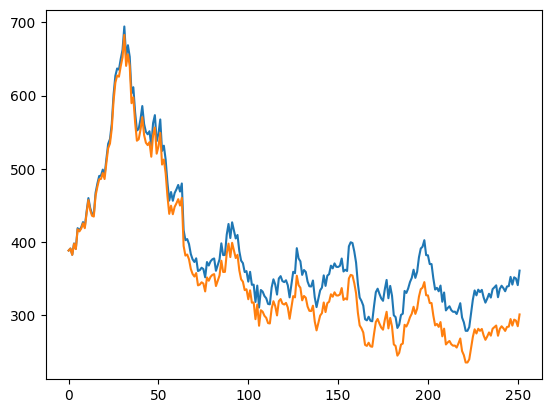

In [10]:
plt.plot(sim_prices)
plt.plot(sim_prices_2)

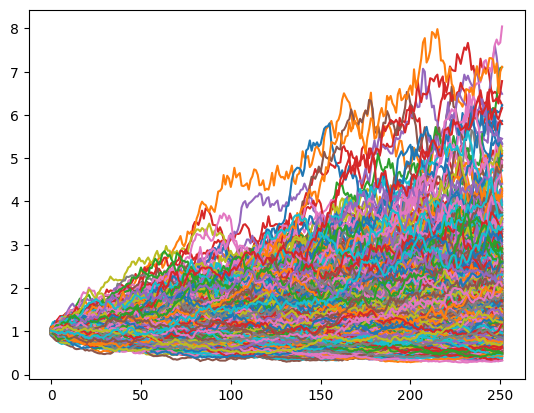

In [13]:
simulations = []
num_simulations = 1000
for i in range(num_simulations):
    sim_rets = np.random.normal(mu, sigma, 252)
    sim_prices = np.exp(sim_rets.cumsum())
    simulations.append(sim_prices)
    plt.plot(sim_prices)
    
normal_prices_df = pd.DataFrame(simulations)

In [14]:
normal_prices_df

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,1.008909,1.041779,1.072700,1.106821,1.100128,1.147603,1.177612,1.088420,1.044434,1.106704,...,0.966262,0.932721,0.947847,0.973244,0.949634,0.963048,0.944100,1.006471,0.975599,1.016566
1,0.986365,1.008474,1.053081,1.089792,1.056580,1.047711,1.089160,1.094440,1.039879,1.006522,...,3.317639,3.417123,3.296814,3.180326,3.008406,3.143878,2.890152,3.060388,2.917039,2.830662
2,0.974607,1.057024,1.042009,1.044745,1.077442,1.108282,1.170695,1.248976,1.320402,1.392772,...,3.146482,3.183824,3.208572,3.250619,3.226397,3.252856,3.414465,3.297060,3.423661,3.666351
3,1.019983,1.057219,1.055470,1.033934,1.114377,1.087956,1.122337,1.142137,1.099774,1.036479,...,1.881628,1.865789,1.918479,1.913785,1.887364,1.836362,1.786872,1.762005,1.732787,1.729721
4,1.002515,0.997366,1.040888,1.052722,1.107045,1.148360,1.162910,1.174505,1.174624,1.329267,...,2.197484,2.182291,2.072042,1.985381,2.052302,2.033496,1.944534,1.952488,1.951500,2.192896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.010241,0.990024,1.045681,0.992859,1.026123,1.056410,1.059009,1.065143,1.105194,1.110767,...,2.210690,2.058598,2.128790,2.090186,2.160635,2.077612,2.091659,2.126600,2.054760,2.032944
996,1.041447,1.024647,1.068162,1.086077,1.085421,1.115358,1.096175,1.075062,1.096419,1.039488,...,1.823182,1.902786,1.775393,1.770515,1.857026,2.050946,2.066065,2.141433,2.129325,2.054919
997,1.023891,1.006577,1.006357,1.037343,1.059104,1.051881,1.050032,1.061675,1.015781,0.991335,...,1.016976,1.044478,0.994712,0.947561,0.921389,0.903162,0.886023,0.857742,0.869749,0.848114
998,0.989696,1.038376,0.995968,1.009732,1.041823,1.033441,1.014266,1.091277,1.079121,1.134387,...,1.372178,1.368326,1.320263,1.279621,1.224418,1.266612,1.238085,1.226351,1.202732,1.202228


In [15]:
def normal_sims(returns, num_simulations):
    mu, sigma = returns.mean(), returns.std()
    normal_prices_df = pd.DataFrame()
    for i in range(num_simulations):
        sim_rets = np.random.normal(mu, sigma, 252)
        sim_prices = np.exp(sim_rets.cumsum())
        normal_prices_df[i] = sim_prices
        plt.axhline(initial_price, c = 'k')
        plt.plot(sim_prices)
    return normal_prices_df

---

Using the student-t distribution as it accounts for fat-tails

In [16]:
returns = returns.dropna()

(array([ 0.018042  ,  0.018042  ,  0.018042  ,  0.018042  ,  0.05412601,
         0.09021002,  0.09021002,  0.12629403,  0.14433603,  0.41496609,
         0.84797418,  1.17273025,  2.94084663,  5.66518922, 10.42827824,
        16.45430753, 12.50310869,  7.23484355,  3.84294683,  1.58769634,
         0.95622621,  0.4510501 ,  0.28867206,  0.16237803,  0.16237803,
         0.12629403,  0.05412601,  0.05412601,  0.018042  ,  0.018042  ]),
 array([-0.23651789, -0.22135755, -0.20619721, -0.19103686, -0.17587652,
        -0.16071618, -0.14555583, -0.13039549, -0.11523515, -0.1000748 ,
        -0.08491446, -0.06975412, -0.05459377, -0.03943343, -0.02427309,
        -0.00911274,  0.0060476 ,  0.02120794,  0.03636829,  0.05152863,
         0.06668898,  0.08184932,  0.09700966,  0.11217001,  0.12733035,
         0.14249069,  0.15765104,  0.17281138,  0.18797172,  0.20313207,
         0.21829241]),
 <BarContainer object of 30 artists>)

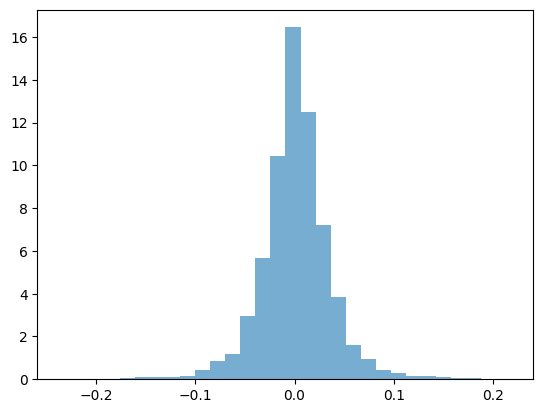

In [17]:
# 2. Distribution Fitting
# Empirical distribution
plt.hist(returns, bins=30, density=True, alpha=0.6, label='Empirical')

In [18]:
# T-distribution fit
df, loc, scale = stats.t.fit(returns)
df, loc, scale

(3.209824936249038, 0.00139997532381771, 0.02359091548235987)

In [19]:
x = np.linspace(returns.min(), returns.max(), 100)
x

array([[-0.23651789],
       [-0.23192385],
       [-0.22732981],
       [-0.22273576],
       [-0.21814172],
       [-0.21354768],
       [-0.20895363],
       [-0.20435959],
       [-0.19976555],
       [-0.1951715 ],
       [-0.19057746],
       [-0.18598342],
       [-0.18138937],
       [-0.17679533],
       [-0.17220129],
       [-0.16760724],
       [-0.1630132 ],
       [-0.15841916],
       [-0.15382511],
       [-0.14923107],
       [-0.14463702],
       [-0.14004298],
       [-0.13544894],
       [-0.13085489],
       [-0.12626085],
       [-0.12166681],
       [-0.11707276],
       [-0.11247872],
       [-0.10788468],
       [-0.10329063],
       [-0.09869659],
       [-0.09410255],
       [-0.0895085 ],
       [-0.08491446],
       [-0.08032042],
       [-0.07572637],
       [-0.07113233],
       [-0.06653829],
       [-0.06194424],
       [-0.0573502 ],
       [-0.05275616],
       [-0.04816211],
       [-0.04356807],
       [-0.03897402],
       [-0.03437998],
       [-0

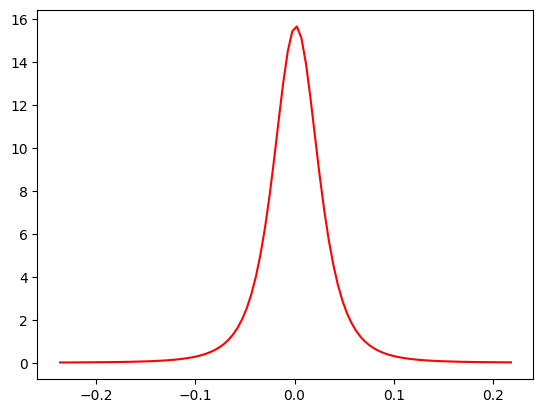

In [20]:
plt.plot(x, stats.t.pdf(x, df, loc, scale), 'r-', label='T-Distribution Fit')

In [21]:
# Kolmogorov-Smirnov test
ks_statistic, p_value = stats.kstest(returns.dropna(), lambda x: stats.t.cdf(x, df, loc, scale))
print(f"KS Statistic: {ks_statistic}, P-value: {p_value}")

KS Statistic: [0.01344701], P-value: [0.51864429]


In [22]:
simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size = len(returns))

In [23]:
simulated_returns

array([0.02974321, 0.0006759 , 0.01660816, ..., 0.01144846, 0.03359942,
       0.04961274])

In [24]:
simulated_cumulative_returns = np.exp(simulated_returns.cumsum())

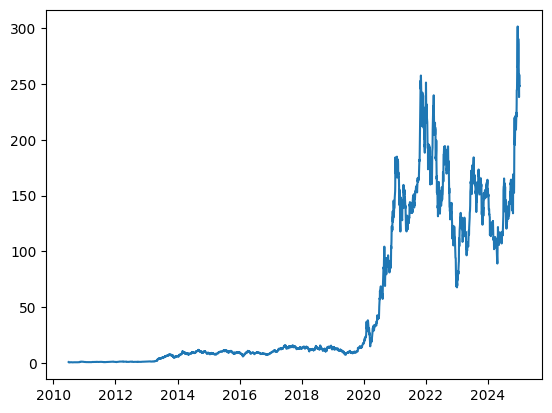

In [25]:
plt.plot(np.exp(returns.cumsum()))

Monte-Carlo using the t-distribution

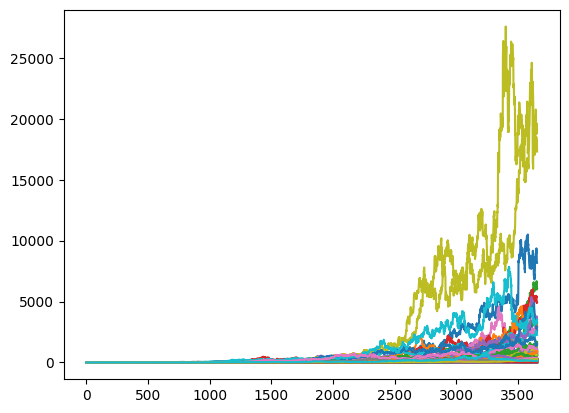

In [26]:
# Monte Carlo Simulation (Parametric Bootstrap)
df, loc, scale = stats.t.fit(returns)
num_simulations = 100
simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size=(num_simulations, len(returns)))
simulated_cumulative_returns = np.exp(simulated_returns.cumsum(axis=1))
simulated_prices_df = pd.DataFrame(simulated_cumulative_returns)
for i in range(num_simulations):
    plt.plot(simulated_cumulative_returns[i, :])

In [27]:
def t_sims(returns, num_simulations):
    df, loc, scale = stats.t.fit(returns)
    simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size=(num_simulations, len(returns)))
    simulated_cumulative_returns = np.exp(simulated_returns.cumsum(axis=1))
    simulated_prices_df = pd.DataFrame(simulated_cumulative_returns).transpose()
    for i in range(num_simulations):
        plt.plot(simulated_cumulative_returns[i, :])

In [28]:
# 2. Define the Performance Metric Functions

def max_drawdown_fnct(prices):
    """Calculate the maximum drawdown (peak to trough)."""
    drawdowns = (prices / prices.cummax() - 1)
    return drawdowns.min()

def average_drawdown(prices):
    """Calculate the average drawdown (peak to trough)."""
    drawdowns = (prices / prices.cummax() - 1)
    return drawdowns.mean()

def average_drawdown_duration(prices):
    """Calculate the average duration of drawdowns."""
    drawdowns = (prices / prices.cummax() - 1)
    drawdown_durations = []
    drawdown_start = None
    for i in range(1, len(drawdowns)):
        if drawdowns[i] < 0:
            if drawdown_start is None:
                drawdown_start = i
        else:
            if drawdown_start is not None:
                drawdown_durations.append(i - drawdown_start)
                drawdown_start = None
    return np.mean(drawdown_durations) if drawdown_durations else 0

def sharpe_ratio_fnct(prices, risk_free_rate=0):
    """Calculate the Sharpe ratio."""
    returns = prices.pct_change().dropna()
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std() if excess_returns.std() != 0 else 0

In [29]:
# 3. Calculate Metrics for Each Simulation
metrics = {
    'max_drawdown': [],
    'avg_drawdown': [],
    'avg_drawdown_duration': [],
    'sharpe_ratio': [],
}

# Calculate metrics for each simulation path
for i in range(num_simulations):
    sim_prices = simulated_prices_df.iloc[:, i]  # Get the i-th column (price path)
    metrics['max_drawdown'].append(max_drawdown_fnct(sim_prices))
    metrics['avg_drawdown'].append(average_drawdown(sim_prices))
    metrics['avg_drawdown_duration'].append(average_drawdown_duration(sim_prices))
    metrics['sharpe_ratio'].append(sharpe_ratio_fnct(sim_prices))

# 4. Convert metrics to a DataFrame for easy handling
metrics_df = pd.DataFrame(metrics)


In [30]:
def metrics_df_fnct(df, num_simulations):
    metrics = {
        'max_drawdown': [],
        'avg_drawdown': [],
        'avg_drawdown_duration': [],
        'sharpe_ratio': [],
    }

    # Calculate metrics for each simulation path
    for i in range(num_simulations):
        sim_prices = df.iloc[:, i]  # Get the i-th column (price path)
        metrics['max_drawdown'].append(max_drawdown_fnct(sim_prices))
        metrics['avg_drawdown'].append(average_drawdown(sim_prices))
        metrics['avg_drawdown_duration'].append(average_drawdown_duration(sim_prices))
        metrics['sharpe_ratio'].append(sharpe_ratio_fnct(sim_prices))

    # Convert metrics to a DataFrame for easy handling
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

In [31]:
metrics_df.describe()

,max_drawdown,avg_drawdown,avg_drawdown_duration,sharpe_ratio
count,100.000000,100.000000,100.000000,100.000000
mean,-0.716666,-0.420104,9.121095,0.173390
std,0.152939,0.121326,8.331027,0.062983
min,-0.848308,-0.535585,1.000000,0.029242
25%,-0.807925,-0.501847,2.000000,0.135584
50%,-0.781545,-0.474828,8.666667,0.186464
75%,-0.697280,-0.381528,13.250000,0.227154
max,-0.167119,-0.087164,38.500000,0.266627


In [32]:
# Example Scoring (Adapt weights and targets to your needs)
def score_strategy(mdd, avg_dd, sharpe, recovery):
    weights = [0.25, 0.25, 0.25, 0.25]
    mdd_score = 100 - (abs(mdd) / 0.50) * 100
    avg_dd_score = 100 - (abs(avg_dd) / 0.25) * 100
    avg_dd_duration_score = 100 - (abs(recovery) / 50) * 100
    sharpe_score = (sharpe) / 0.5 * 100
    total_score = np.dot(weights, [mdd_score, avg_dd_score, avg_dd_duration_score, sharpe_score])
    return total_score

mdd = metrics_df['max_drawdown'].mean()
avg_dd = metrics_df['avg_drawdown'].mean()
sharpe = metrics_df['sharpe_ratio'].mean()
recovery = metrics_df['avg_drawdown_duration'].mean()

overall_score = score_strategy(mdd, avg_dd, sharpe, recovery)
print(f"Average Max Drawdown: {mdd}")
print(f"Average Drawdown: {avg_dd}")
print(f"Average Recovery Time: {recovery}")
print(f"Sharpe Ratio: {sharpe}")
print(f"Overall Score: {overall_score}")

Average Max Drawdown: -0.7166655129318065
Average Drawdown: -0.4201043815584583
Average Recovery Time: 9.121095238095238
Sharpe Ratio: 0.17339040193077984
Overall Score: 1.2652586750552182


In [33]:
confidence_level = 0.95
lower_bound_mdd = np.percentile(mdd, (1-confidence_level)/2 * 100)
upper_bound_mdd = np.percentile(mdd, (1+confidence_level)/2 * 100)
print(f"{confidence_level*100:.0f}% confidence interval for Max Drawdown: [{lower_bound_mdd:.4f}, {upper_bound_mdd:.4f}]")

95% confidence interval for Max Drawdown: [-0.7167, -0.7167]


---

Using Block Bootstrapping, a shuffling method that keeps the autocorrelation of the data

In [34]:
# Parameters
block_size = 5
num_iterations = 100
resampled_series = []

for _ in range(num_iterations):
    # Create overlapping blocks
    blocks = [returns[i:i + block_size] for i in range(len(returns) - block_size + 1)]
    # Randomly sample blocks
    sampled_blocks = [blocks[np.random.randint(0, len(blocks))] for _ in range(len(returns) // block_size + 1)]
        #Shuffles the blocks, with replacement 
    # Concatenate and truncate
    resampled = np.concatenate(sampled_blocks)[:len(returns)]
    resampled_series.append(resampled)

# Analyze resampled series (e.g., calculate mean, variance, etc.)
bootstrap_means = [np.mean(series) for series in resampled_series]
print("Bootstrap Mean Estimate:", np.mean(bootstrap_means))

Bootstrap Mean Estimate: 0.001605854423137048


In [35]:
def block_bootstrap(returns, block_size, num_iterations):
    resampled_series = []
    for _ in range(num_iterations):
        blocks = [returns[i:i + block_size] for i in range(len(returns) - block_size + 1)]
        sampled_blocks = [blocks[np.random.randint(0, len(blocks))] for _ in range(len(returns) // block_size + 1)]
        resampled = np.concatenate(sampled_blocks)[:len(returns)]
        resampled_cum = np.exp(resampled.cumsum())
        resampled_series.append(resampled_cum)
    return pd.DataFrame(resampled_series).transpose()


# Parameters
block_size = 20  # A common value for daily data is around 20 (roughly a month)
num_iterations = 100

bootstrapped_returns = block_bootstrap(returns, block_size, num_iterations)

In [36]:
bootstrapped_returns

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.982421,1.013762,1.035411,1.039092,0.989570,0.982791,0.915559,0.983091,1.006881,0.878747,...,1.011358,0.958262,0.984304,0.970174,0.999638,0.993859,1.005352,0.978437,0.877578,1.003855
1,0.994631,0.978869,1.023303,0.956807,0.982724,0.979036,0.942908,1.000338,1.011952,0.881730,...,0.966595,0.960393,1.029596,0.942694,0.993168,0.953071,0.971872,0.963830,0.922552,1.012046
2,1.020030,0.986726,1.048967,0.942592,0.974882,0.951189,0.959660,1.022997,1.015936,0.918683,...,0.973544,0.976415,1.070403,0.988941,0.981956,1.003186,0.943622,0.973661,0.895762,0.991776
3,1.014195,1.021087,1.036843,0.906233,0.970065,0.959324,0.974550,1.053433,0.993118,0.921859,...,0.984723,0.996356,1.036323,0.916555,0.987060,0.982966,0.815549,0.928866,0.917844,1.020912
4,1.070258,1.018867,1.035228,0.887370,0.979937,0.977159,0.943934,1.075414,1.026439,0.901169,...,1.044495,1.028536,1.064125,0.918901,0.995539,0.943569,0.865622,0.956086,0.972317,1.004176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,2932.752332,36.225002,620.111154,318.568233,682.200810,192.253343,151.207259,43.885703,1046.823649,824.365806,...,110.866083,2797.613996,20891.635913,8440.187660,2316.607073,110.297580,30.335955,38.277398,1619.591252,653.340111
3652,3000.268976,33.166117,615.341098,327.144130,700.983886,190.982208,150.556114,44.731833,1104.214364,854.676962,...,110.838108,2857.464088,20487.419213,8395.607488,2388.677664,113.443066,30.191072,37.259812,1656.362851,652.259046
3653,2990.390593,34.156848,612.161018,323.377801,716.345291,195.196506,157.368611,45.154903,1009.905956,857.035241,...,111.053882,2978.554774,21836.480428,8369.947514,2418.375826,116.804753,29.812052,35.863617,1644.564211,653.047954
3654,2955.481503,34.763672,628.591324,317.037320,703.853407,193.827585,156.864772,45.971054,1027.251071,848.989291,...,111.205727,3059.280571,23239.521867,8540.581686,2392.052533,119.053787,30.083705,37.342645,1642.024622,657.401389


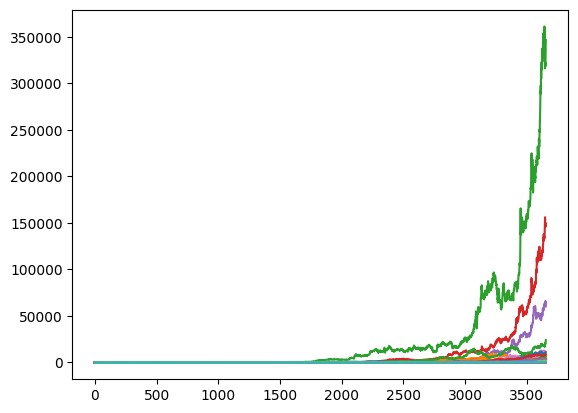

In [37]:
for i in range(num_iterations):
    plt.plot(bootstrapped_returns.iloc[:, i])

In [38]:
metrics_df = metrics_df_fnct(bootstrapped_returns, num_iterations)

In [39]:
mdd = metrics_df['max_drawdown'].mean()
avg_dd = metrics_df['avg_drawdown'].mean()
sharpe = metrics_df['sharpe_ratio'].mean()
recovery = metrics_df['avg_drawdown_duration'].mean()

overall_score = score_strategy(mdd, avg_dd, sharpe, recovery)

In [40]:
overall_score

-4.0048781092238155

In [41]:
mdd

-0.7390089047832546

In [42]:
def confidence_interval_fnct(metric, confidence_level):
    lower_bound = np.percentile(metric, (1-confidence_level)/2 * 100)
    upper_bound = np.percentile(metric, (1+confidence_level)/2 * 100)
    return lower_bound, upper_bound

confidence_interval_fnct(metrics_df['max_drawdown'].abs(), 0.95)

(0.557542936135064, 0.9361433550543604)

In [43]:
import numpy as np
import scipy.stats as st

def calculate_var(returns, confidence_level=0.95, method="historical"):
    """Calculates Value at Risk (VaR).

    Args:
        returns (array-like): Array of returns.
        confidence_level (float): Confidence level (e.g., 0.95 for 95% VaR).
        method (str): Calculation method ("historical", "parametric").

    Returns:
        float: VaR value.
    """
    if method == "historical":
        # Historical Simulation
        var = np.quantile(returns, 1 - confidence_level)  #Quantile function is used for VaR
    elif method == "parametric":
        # Variance-Covariance Method (assuming normal distribution)
        mu = np.mean(returns)
        sigma = np.std(returns)
        var = st.norm.ppf(1 - confidence_level, mu, sigma)[0]
    else:
        raise ValueError("Invalid VaR method.")
    return var


var_historical = calculate_var(returns, method="historical")
var_parametric = calculate_var(returns, method="parametric")
var_historical, var_parametric

C:\Users\yassi\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


(-0.0525701153045228, -0.057709103430116544)

In [44]:
def calculate_cvar(returns, confidence_level=0.95):
    """Calculates Conditional Value at Risk (CVaR).

    Args:
        returns (array-like): Array of returns.
        confidence_level (float): Confidence level (e.g., 0.95 for 95% CVaR).

    Returns:
        float: CVaR value.
    """
    var = np.quantile(returns, 1 - confidence_level)
    cvar = np.mean(returns[returns <= var])
    return cvar

# Example usage (using the same random returns):
cvar = calculate_cvar(returns)
print(f"CVaR (95%): {cvar:.4f}")

CVaR (95%): -0.0822


Putting all together in functions

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

class Returns_Metrics():
    def __init__(self, prices):
       self.cum_returns = prices
    
    # 2. Define the Performance Metric Functions
    def max_drawdown_fnct(self):
        """Calculate the maximum drawdown (peak to trough)."""
        drawdowns = (self.cum_returns / self.cum_returns.cummax() - 1)
        return drawdowns.min()

    def average_drawdown(self):
        """Calculate the average drawdown (peak to trough)."""
        drawdowns = (self.cum_returns / self.cum_returns.cummax() - 1)
        return drawdowns.mean()

    def average_drawdown_duration(self):
        """Calculate the average duration of drawdowns."""
        drawdowns = (self.cum_returns / self.cum_returns.cummax() - 1)
        drawdown_durations = []
        drawdown_start = None
        for i in range(1, len(drawdowns)):
            if drawdowns[i] < 0:
                if drawdown_start is None:
                    drawdown_start = i
            else:
                if drawdown_start is not None:
                    drawdown_durations.append(i - drawdown_start)
                    drawdown_start = None
        return np.mean(drawdown_durations) if drawdown_durations else 0

    def sharpe_ratio_fnct(self, risk_free_rate=0):
        """Calculate the Sharpe ratio."""
        returns = self.cum_returns.pct_change().dropna()
        excess_returns = returns - risk_free_rate
        return excess_returns.mean() / excess_returns.std() if excess_returns.std() != 0 else 0
    
    def var(self, confidence_level):
        simple_returns = np.diff(self.cum_returns) / self.cum_returns[:-1]
        log_returns = np.log(simple_returns + 1)
        return np.quantile(log_returns   , 1 - confidence_level)
    
    def cvar(self, confidence_level):
        simple_returns = np.diff(self.cum_returns) / self.cum_returns[:-1]
        log_returns = np.log(simple_returns + 1)
        var = np.quantile(log_returns, 1 - confidence_level)
        return np.mean(log_returns[log_returns <= var])
    
    def confidence_interval_fnct(self, metric_series, confidence_level):
        lower_bound = np.percentile(metric_series, (1-confidence_level)/2 * 100)
        upper_bound = np.percentile(metric_series, (1+confidence_level)/2 * 100)
        return lower_bound, upper_bound
    
    
class Stress_Test():
    def __init__(self, returns, num_simulations, confidence_level):
        self.returns = returns
        self.num_simulations = num_simulations
        self.confidence_level = confidence_level
        
    def normal_sims(self):
        mu, sigma = self.returns.mean(), self.returns.std()
        simulations = []
        for i in range(self.num_simulations):
            sim_rets = np.random.normal(mu, sigma, 252)
            sim_prices = np.exp(sim_rets.cumsum())
            simulations.append(sim_prices)
            plt.plot(sim_prices)
            
        normal_prices_df = pd.DataFrame(simulations)
        return normal_prices_df
    
    def t_sims(self):
        df, loc, scale = stats.t.fit(self.returns)
        simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size=(self.num_simulations, len(self.returns)))
        simulated_cumulative_returns = np.exp(simulated_returns.cumsum(axis=1))
        simulated_prices_df = pd.DataFrame(simulated_cumulative_returns).transpose()
        for i in range(self.num_simulations):
            plt.plot(simulated_cumulative_returns[i])
        return simulated_prices_df
    
    def block_bootstrap(self, block_size):
        resampled_series = []
        for _ in range(self.num_simulations):
            blocks = [self.returns[i:i + block_size] for i in range(len(self.returns) - block_size + 1)]
            sampled_blocks = [blocks[np.random.randint(0, len(blocks))] for _ in range(len(self.returns) // block_size + 1)]
            resampled = np.concatenate(sampled_blocks)[:len(self.returns)]
            resampled_cum = np.exp(resampled.cumsum())
            resampled_series.append(resampled_cum)
            resampled_df = pd.DataFrame(resampled_series).transpose()
        for i in range(self.num_simulations):
            plt.plot(resampled_df[i])
        return resampled_df
    
    def metrics_df_fnct(self, sims_df):
        metrics_dict = {
            'max_drawdown': [],
            'avg_drawdown': [],
            'avg_drawdown_duration': [],
            'sharpe_ratio': [],
            'var': [],
            'cvar': []
        }
        

        # Calculate metrics for each simulation path
        for i in range(self.num_simulations):
            sim_prices = sims_df.iloc[:, i]  # Get the i-th column (price path)
            metrics = Returns_Metrics(sim_prices)
            metrics_dict['max_drawdown'].append(metrics.max_drawdown_fnct())
            metrics_dict['avg_drawdown'].append(metrics.average_drawdown())
            metrics_dict['avg_drawdown_duration'].append(metrics.average_drawdown_duration())
            metrics_dict['sharpe_ratio'].append(metrics.sharpe_ratio_fnct())
            metrics_dict['var'].append(metrics.var(self.confidence_level))
            metrics_dict['cvar'].append(metrics.cvar(self.confidence_level))
        
        # Convert metrics to a DataFrame for easy handling
        metrics_df = pd.DataFrame(metrics_dict)
        return metrics_df
    
    def score_strategy(self, metrics_df):
        mdd = metrics_df['max_drawdown'].mean()
        avg_dd = metrics_df['avg_drawdown'].mean()
        sharpe = metrics_df['sharpe_ratio'].mean()
        recovery = metrics_df['avg_drawdown_duration'].mean()
        var = metrics_df['var'].mean()
        cvar = metrics_df['cvar'].mean()
        
        
        weights = [1 / len(metrics_df.columns)] * len(metrics_df.columns)
        mdd_score = 100 - (abs(mdd) / 0.50) * 100
        avg_dd_score = 100 - (abs(avg_dd) / 0.25) * 100
        avg_dd_duration_score = 100 - (abs(recovery) / 50) * 100
        sharpe_score = (sharpe) / 0.5 * 100
        var_score = 100 - abs(var) / 0.2 * 100
        cvar_score = 100 - abs(cvar) / 0.2 * 100
        
        total_score = np.dot(weights, [mdd_score, avg_dd_score, avg_dd_duration_score, sharpe_score, var_score, cvar_score])
        return total_score    
        

In [46]:
stress_test = Stress_Test(returns, 100, 0.95)

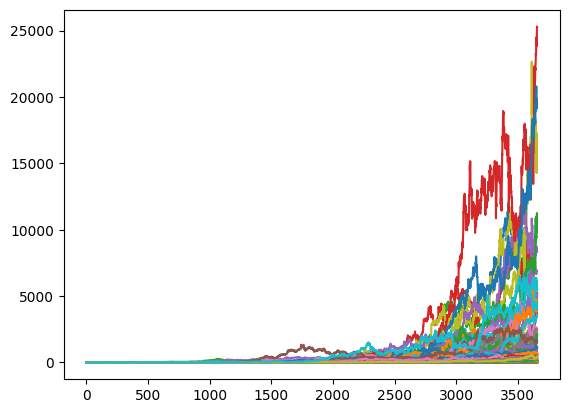

In [47]:
sims = stress_test.block_bootstrap(20)

In [48]:
sims

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.016427,1.004856,1.001262,0.988326,1.017380,0.977474,1.021948,0.976223,1.010502,1.004183,...,1.090742,1.072556,1.049705,0.973047,0.959920,0.982625,0.994718,0.946655,0.989503,1.017970
1,0.932525,0.984461,1.002577,0.974215,1.009978,0.987329,1.004801,1.018742,1.026886,1.002761,...,1.017599,1.062112,1.028580,0.962002,0.969409,0.983366,0.979351,0.989969,0.985240,1.003941
2,0.924903,0.953383,0.977886,0.987396,0.991954,1.025124,1.008230,0.936231,0.989618,0.959717,...,1.022731,1.157386,0.981982,0.937954,0.938465,0.971175,0.991585,1.000017,0.991741,0.991383
3,0.977741,0.923600,0.986825,0.980212,1.024783,1.028302,0.990741,0.883564,1.038108,0.958964,...,1.272227,1.098435,0.992855,0.930895,0.942709,0.967273,0.982036,0.997472,1.002824,1.028268
4,0.920291,0.926514,0.988804,0.970335,1.059543,1.032236,1.003086,0.933218,1.061514,0.931398,...,1.407149,1.056026,0.975769,0.936130,0.955853,0.971546,0.976277,0.989523,1.019369,1.023172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,10563.043789,1092.026080,4836.581200,4852.226908,172.585639,14.344127,675.892955,648.195351,139.352410,2193.903912,...,1069.801674,715.891910,173.660014,388.738990,360.902475,1444.457791,324.954901,375.724682,331.875417,4461.251500
3652,10423.282933,1057.900242,4897.587567,5004.967297,170.395401,14.575557,684.912091,649.334130,140.456628,2259.958342,...,1123.734496,705.086670,172.847036,379.495886,343.773577,1475.648119,322.908103,373.082001,339.130423,4069.995464
3653,9988.233630,1056.349088,4980.783774,4972.693276,174.525443,14.473731,683.493360,629.273769,139.462837,2238.612270,...,1161.970230,698.464074,167.291720,396.024625,339.820765,1503.601439,329.243415,356.955346,366.506412,4179.963118
3654,10010.451418,1056.349088,4992.044403,5034.844251,179.531615,14.584818,683.155590,659.057701,161.694463,2224.618547,...,1156.094240,699.771175,177.408757,363.949644,324.848104,1521.109227,330.802913,346.311777,374.787065,3979.705386


In [56]:
metrics_df = stress_test.metrics_df_fnct(sims)
score = stress_test.score_strategy(metrics_df)

In [57]:
metrics_df

,max_drawdown,avg_drawdown,avg_drawdown_duration,sharpe_ratio,var,cvar
0,-0.586771,-0.159561,20.813333,0.087823,-0.050635,-0.075755
1,-0.591149,-0.226988,30.981481,0.071626,-0.051585,-0.078072
2,-0.527025,-0.175792,23.429630,0.080763,-0.052589,-0.081258
3,-0.518924,-0.154725,21.902778,0.084960,-0.050305,-0.074461
4,-0.896730,-0.296627,19.234234,0.056700,-0.052594,-0.088719
...,...,...,...,...,...,...
95,-0.794691,-0.278840,24.755906,0.074701,-0.052221,-0.075320
96,-0.695004,-0.228403,30.617647,0.061674,-0.053476,-0.080542
97,-0.791078,-0.277123,32.656566,0.062611,-0.053132,-0.079120
98,-0.688145,-0.264666,33.372549,0.061597,-0.053987,-0.087495


In [58]:
score

22.459557210328768

In [59]:
sim_prices = sims[2]  # Get the i-th column (price path)
metrics = Returns_Metrics(sim_prices)
metrics.var(confidence_level)

-0.052589435576893835

In [61]:
metrics.cvar(confidence_level)

-0.0812584791128243